In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt # rainplot
import pickle
import ipynb.fs.defs.functions as fct
from scipy import stats
import pandas as pd

In [2]:
all_users_folder = 'data/all_users/'

## Model 6

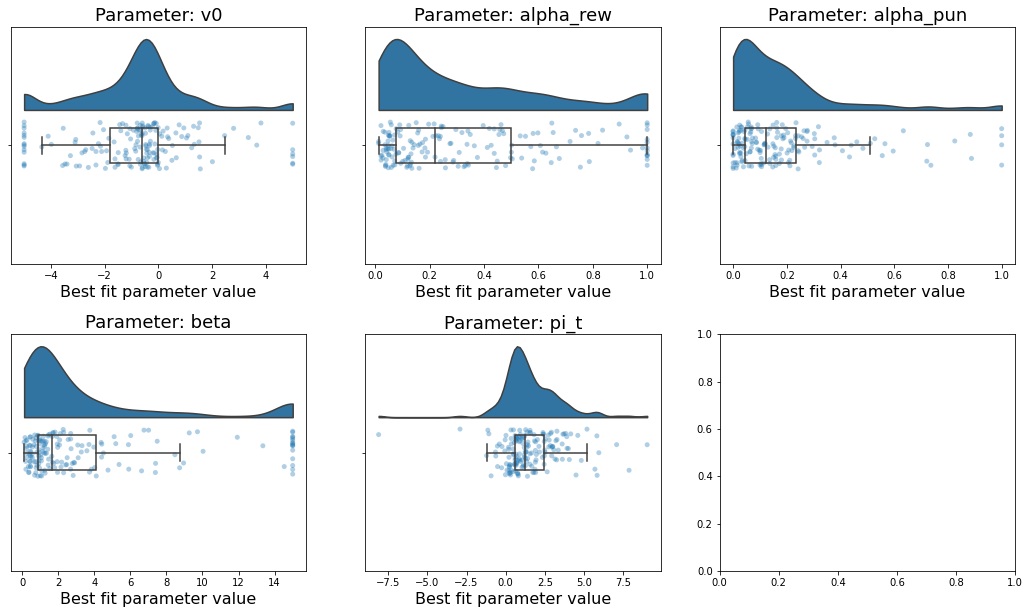

In [3]:
# Plot model parameters
model_folder = all_users_folder + 'mod6/'
data_mod = pd.read_pickle(model_folder+'mod_param_fits.pkl')
mod_info = pd.read_pickle(model_folder+'mod_parameters.pkl')
fct.plot_model_parameters(data_mod, mod_info['param_names'])

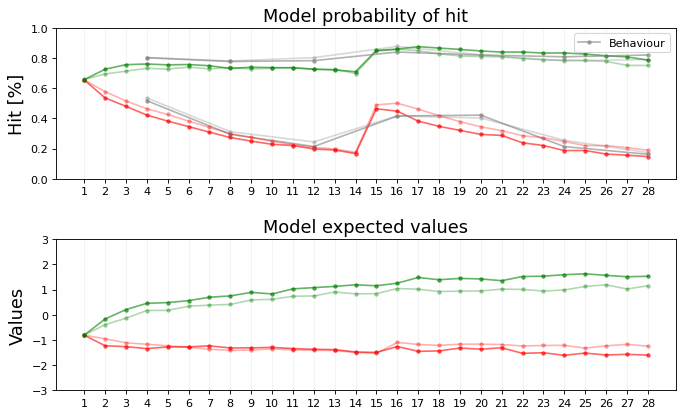

In [4]:
# Plot model predictions and behaviour
ev_per_trial = pd.read_pickle(all_users_folder + 'mod6/mod_ev_per_trial.pkl');
p_hit_per_trial = pd.read_pickle(all_users_folder + 'mod6/mod_p_hit_per_trial.pkl');
fct.fig_modelpred_on_behav(ev_per_trial, p_hit_per_trial, all_users_folder)

In [224]:
p_hit_per_trial[p_hit_per_trial['Cue']=='HP'].loc[2]

Cue          HP
1      0.271416
2      0.245654
3      0.229422
4      0.221594
5      0.213958
6      0.165894
7      0.131934
8      0.122001
9      0.092173
10     0.069063
11     0.055972
12     0.049277
13     0.038099
14     0.032045
15     0.245654
16      0.17219
17     0.165894
18     0.142545
19     0.131934
20     0.108313
21     0.095993
22     0.092173
23     0.058389
24     0.055972
25      0.05365
26     0.051419
27     0.047218
28     0.045242
Name: 2, dtype: object

### Sliding average: Model

In [250]:
window_size = 4

# Parameters
N_trials = len(samples)
N_iter = int(N_trials/window_size)

# Cue
cue = 'HR'

slide_avs_all = []

# Loop
for index, row in p_hit_per_trial[p_hit_per_trial['Cue']==cue].iterrows():
    
    hit_probs = row.values[1::]
    
    # Simulate behaviour (samples)
    samples = np.random.binomial(1, hit_probs.tolist(), len(hit_probs))
    
    # Fill in df_single_part
    slide_avs = []
    
    for i in range(N_iter):

        # Select trials
        window_start = i*window_size
        window = samples[window_start:window_start+window_size]

        slide_av = window.sum()/window_size

        slide_avs.append(slide_av)
    
    slide_avs_all.append(slide_avs)
    
df_slide_av = pd.DataFrame(slide_avs_all)
slide_av_model = df_slide_av.mean()

### Sliding average: behaviour

In [251]:
# Timepoints
window_size = 4*4
N_trials = 112
timepoints = ['t'+ str(t+1) for t in range(int(N_trials/window_size))]

# Load behaviour and compute stats
hit_perc_per_t = pd.read_pickle(all_users_folder + 'hit_perc_per_t/hit_perc_per_t_w' + str(window_size) + '.pkl');
hit_perc_per_t.drop('ID', axis=1, inplace=True);

### Plot

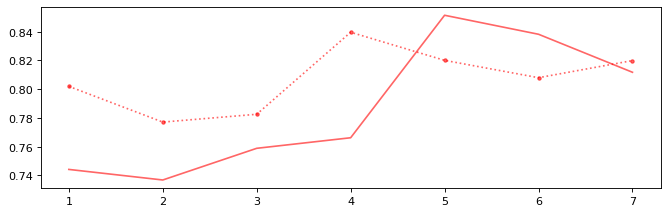

In [252]:
# Plot
f, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=80)

data_model = slide_av_model
data_behav = hit_perc_per_t.loc['Cue_HR'].mean()

x = range(1,8)

p_b = ax.plot(x, data_behav, '.:', color='red', alpha=0.6);
p_m = ax.plot(x, data_model, '-', color='red', alpha=0.6);

plt.show()